In [1]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import (ClusterCentroids, CondensedNearestNeighbour, EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours, AllKNN, InstanceHardnessThreshold,
                                     NearMiss, NeighbourhoodCleaningRule, OneSidedSelection,
                                     RandomUnderSampler, TomekLinks)
from hdbscan import HDBSCAN

COLORS = 'bry'

In [2]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3, class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2, n_informative=2,
                               n_redundant=0, n_repeated=0, n_classes=n_classes,
                               n_clusters_per_class=n_clusters, weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [6]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

    for i, color in zip(np.unique(y), COLORS):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label='Class #{}'.format(i),
                   cmap=plt.cm.Paired, alpha=0.25)
        ax.legend()

In [7]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_sample(X, y)
    for i, color in zip(np.unique(y_res), COLORS):
        idx = np.where(y_res == i)
        ax.scatter(X_res[idx, 0], X_res[idx, 1], c=color,
                   label='Class #{}'.format(i), cmap=plt.cm.Paired,
                   alpha=0.6)
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.legend()

# Over-sampling

The learning step of most machine learning algorithm might be affected when the number of samples in each classes is far to be balanced. This issue is illustrated by training a linear SVM classifier on a 3-classes toy dataset. To observe the effect of previously stated, the number of samples in each class varies as the balancing ratio.

### Linear SVM

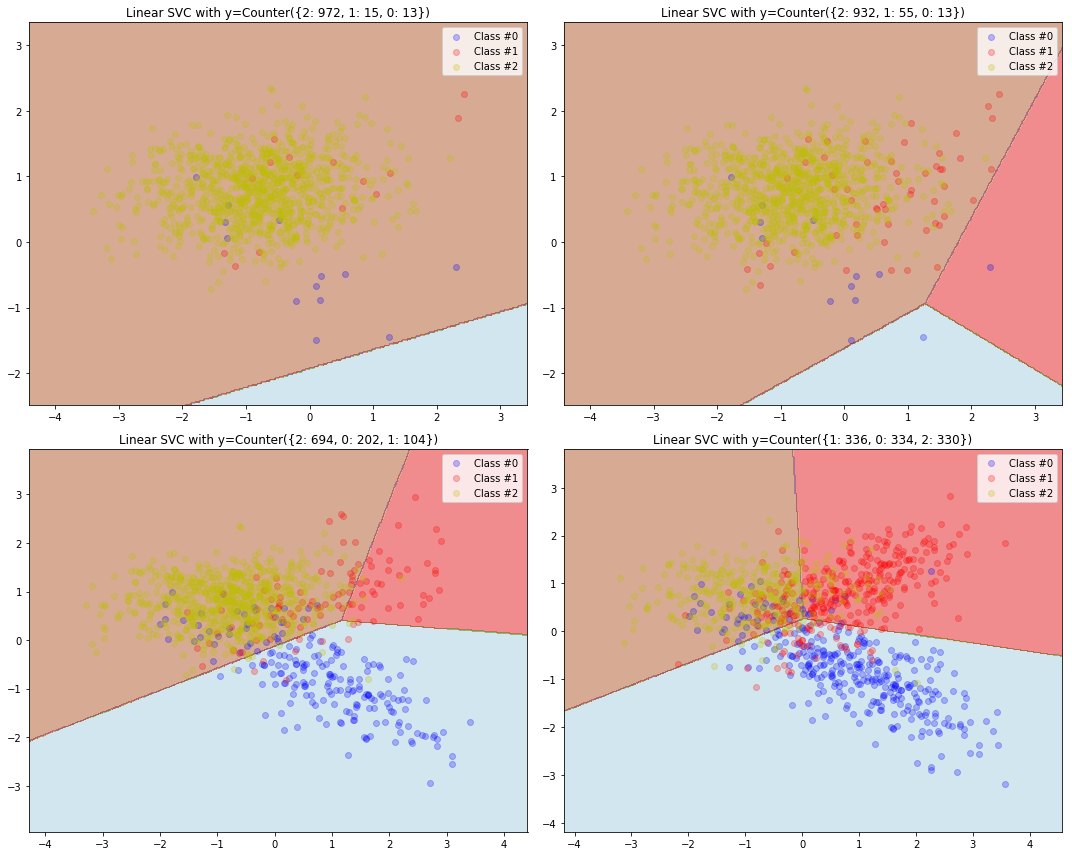

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = LinearSVC().fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))
# plt.show()
f.tight_layout()
plt.show()

For a linear SVM, as expected, the learning process is strongly affected whenever the classes are imbalanced.

### Logistic regression

The previous experiment is repeated with a logistic regression classifier.

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = LogisticRegressionCV().fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Logistic regression with y={}'.format(Counter(y)))
plt.show()

The exact conclusion can be drown.

### Decision Tree

The above experiment is repeated using a decision tree classifier. The maximum depth is limited.

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Decision tree with y={}'.format(Counter(y)))
plt.show()

In this case, the learning process is not affected as with a linear classifier.

### k-Nearest Neighbors

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('KNN with y={}'.format(Counter(y)))
plt.show()

### Comparison of the over-sampling method

In [10]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
                                               
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = ((ax3, ax4), (ax5, ax6), (ax7, ax8))
for ax, sampler in zip(ax_arr, (RandomOverSampler(random_state=0),
                                SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [28012, 10655]

In [ ]:
# Make an identity sampler
from imblearn.base import SamplerMixin
from imblearn.utils import hash_X_y
class FakeSampler(SamplerMixin):
    
    def fit(self, X, y):
        self.ratio_ = 1
        self.X_hash_ = hash_X_y(X, y)
        return self
    
    def sample(self, X, y):
        return X, y
    
    def _sample(self, X, y):
        pass
    
    def fit_sample(self, X, y):
        return X, y

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
sampler = FakeSampler()
clf = make_pipeline(sampler, LinearSVC())
plot_resampling(X, y, sampler, ax1)
ax1.set_title('Original data - y={}'.format(Counter(y)))

ax_arr = (ax2, ax3, ax4)
for ax, sampler in zip(ax_arr, (RandomOverSampler(random_state=0),
                                SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_resampling(X, y, sampler, ax)
    ax.set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
f.savefig('/tmp/resampling_over_sampling.png')

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
                                               
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
sampler = SMOTE()
clf = make_pipeline(sampler, LinearSVC())
clf.fit(X, y)
plot_decision_function(X, y, clf, ax2)
ax2.set_title('Decision function for {}'.format(sampler.__class__.__name__))
sampler = ADASYN()
clf = make_pipeline(sampler, LinearSVC())
clf.fit(X, y)
plot_decision_function(X, y, clf, ax3)
ax3.set_title('Decision function for {}'.format(sampler.__class__.__name__))
plt.tight_layout()
f.savefig('/tmp/decision_function_smote_adasyn.png')
# ax2.axis('off')

In [ ]:
ax_arr = [(ax3, ax4)]
for ax, sampler in zip(ax_arr, [RandomOverSampler(random_state=0)]):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

The different over-sampling method solve the issue of the balancing. ADASYN will focus on the difficult sample to classify and will generate some samples around this area. It tends to change the decision function. All those method are reasonable for this toy example. However, there is some interesting inside to think about when selecting one of those method.

To illustrate those, we need to reduce the number of samples available.

In [5]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)
                                               
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = ((ax3, ax4), (ax5, ax6), (ax7, ax8))
for ax, sampler in zip(ax_arr, (RandomOverSampler(random_state=0),
                                SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [14009, 5326]

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)                                               

ax_arr = ((ax1, ax2), (ax3, ax4))
for ax, sampler in zip(ax_arr, (SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
f.savefig('/tmp/particularities_smote_adasyn.png')

SMOTE will generate new samples in all the space while ADASYN will generate more samples near of samples which are considered borderline between the classes. This behaviour can completely corrupt the learning process as depicted above. However, for classes having several cluster, ADASYN can generate, however, better samples since it will not connect the two clusters as SMOTE would do.

Some variants of SMOTE exist which are shown below.

In [ ]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 30))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)


ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8))
string_add = ['regular', 'borderline-1', 'borderline-2', 'SVM']
for str_add, ax, sampler in zip(string_add,
                                ax_arr, (SMOTE(random_state=0),
                                         SMOTE(random_state=0, kind='borderline1'),
                                         SMOTE(random_state=0, kind='borderline2'),
                                         SMOTE(random_state=0, kind='svm'))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {} {}'.format(str_add, sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {} {}'.format(str_add, sampler.__class__.__name__))
plt.tight_layout()
f.savefig('/tmp/smote_kinds.png')

In this case, SMOTE will focus the generation of new samples next to the border by finding the samples of interest.
The borderline versions will find samples using the nearest neigbhours properties while the svm version will use the support vectors to later on generate samples.

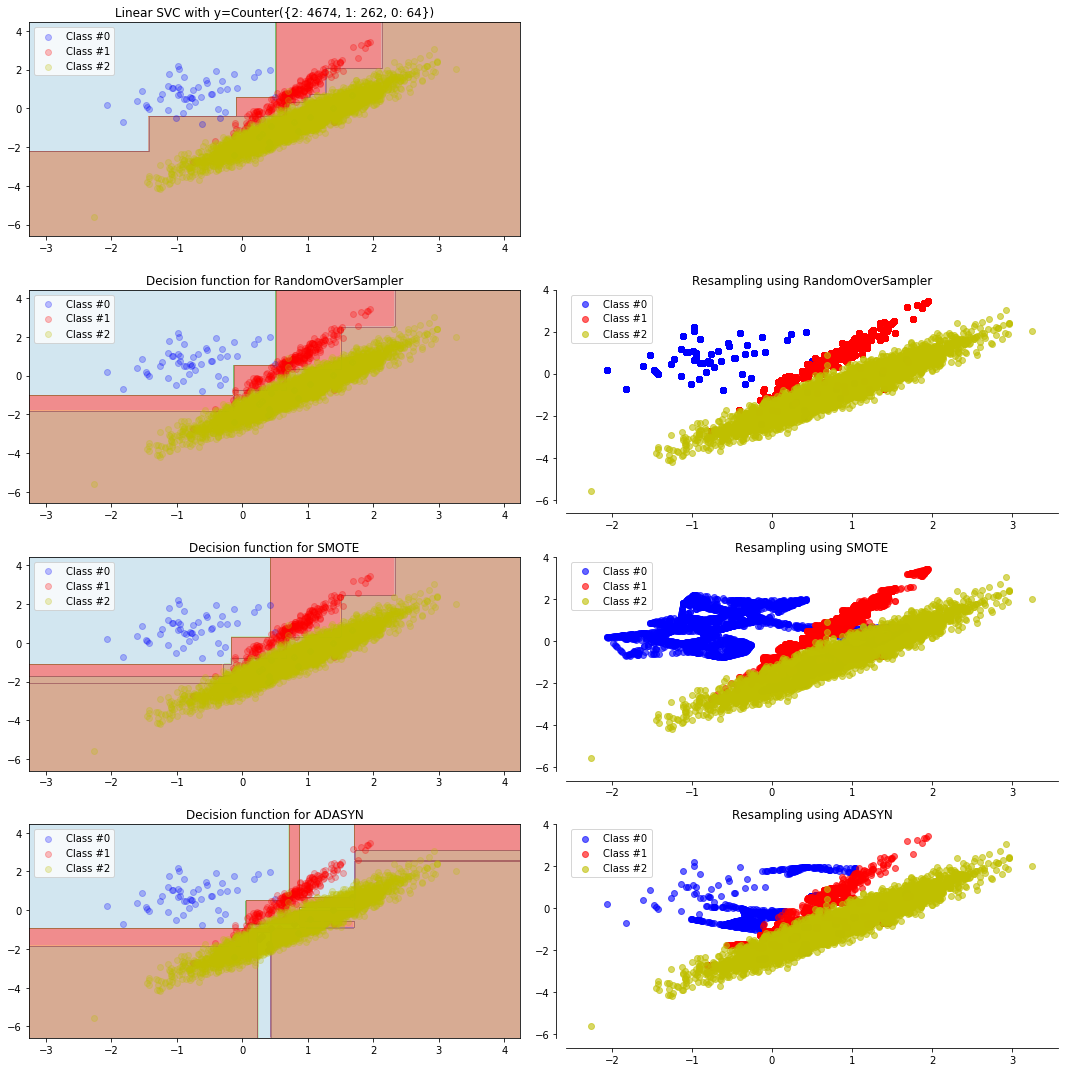

In [9]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)
                                               
clf = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = ((ax3, ax4), (ax5, ax6), (ax7, ax8))
for ax, sampler in zip(ax_arr, (RandomOverSampler(random_state=0),
                                SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, DecisionTreeClassifier(max_depth=5, random_state=0))
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

In [ ]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8),
    (ax9, ax10)) = plt.subplots(5, 2, figsize=(15, 17))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)
                                               
clf = DecisionTreeClassifier(random_state=0, max_depth=5).fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = ((ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))
for ax, sampler in zip(ax_arr, (SMOTE(random_state=0),
                                SMOTE(random_state=0, kind='borderline1'),
                                SMOTE(random_state=0, kind='borderline2'),
                                SMOTE(random_state=0, kind='svm'))):
    clf = make_pipeline(sampler, DecisionTreeClassifier(max_depth=5, random_state=0))
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

Creation of samples next to the border helps trees to create finer decision and focus in those area

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(18)

f, ax = plt.subplots(1, 1, figsize=(8, 8))

y = np.array([3.65284, 3.52623, 3.51468, 3.22199, 3.21])
z = np.array([0.43, 0.45, 0.6, 0.4, 0.211])

y_2 = np.array([3.3, 3.6])
z_2 = np.array([0.58, 0.34])

ax.scatter(z, y, label='Minority class', s=100)
ax.scatter(z_2, y_2, label='Majority class', s=100)

idx = rng.randint(len(y), size=2)
annotation = [r'$x_i$', r'$x_{zi}$']

for a, i in zip(annotation, idx):
    ax.annotate(a, (z[i], y[i]),
                xytext=tuple([z[i] + 0.01, y[i] + 0.005]),
                fontsize=15)
    

radius = np.sqrt((z[idx[0]] - z[idx[1]]) ** 2 + (y[idx[0]] - y[idx[1]]) ** 2)
circle = plt.Circle((z[idx[0]], y[idx[0]]), radius=radius, alpha=0.2)
ax.add_artist(circle)

ax.plot(z[idx], y[idx], '--', alpha=0.5)

step = rng.uniform()
y_gen = y[idx[0]] + step * (y[idx[1]] - y[idx[0]])
z_gen = z[idx[0]] + step * (z[idx[1]] - z[idx[0]])

ax.scatter(z_gen, y_gen, s=100)
ax.annotate(r'$x_{new}$', (z_gen, y_gen),
            xytext=tuple([z_gen + 0.01, y_gen + 0.005]),
            fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([0.2, 0.7])
ax.set_ylim([3.2, 3.7])

plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

plt.legend()
plt.tight_layout()
# plt.show()
f.savefig('/tmp/sample_generation.png')

# Under-sampling

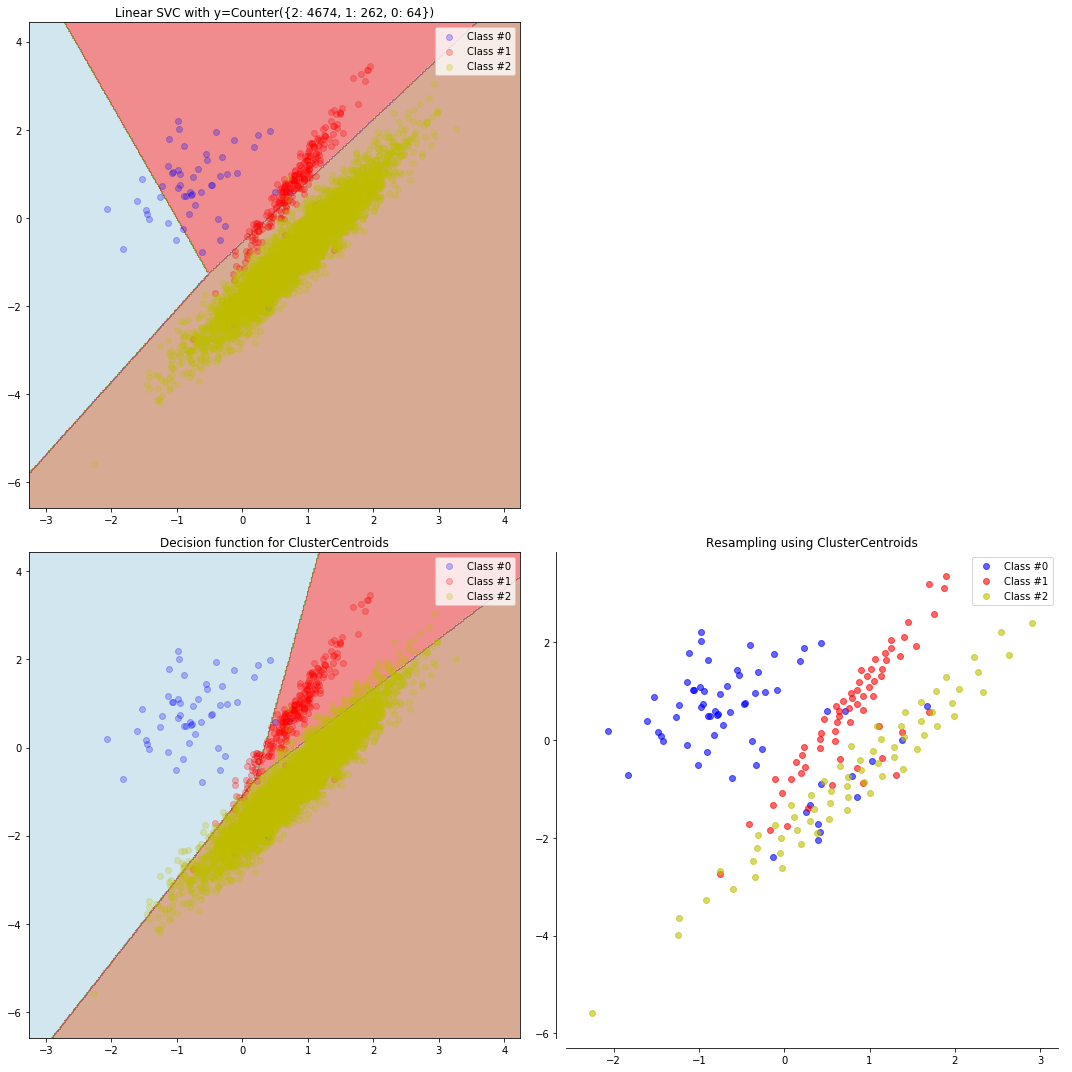

In [8]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)
                                               
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = [(ax3, ax4)]
for ax, sampler in zip(ax_arr, [ClusterCentroids(random_state=0)]):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

/home/lemaitre/Documents/code/toolbox/imbalanced-learn/imblearn/under_sampling/prototype_selection/nearmiss.py:205: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn('The number of the samples to be selected is larger'
/home/lemaitre/Documents/code/toolbox/imbalanced-learn/imblearn/under_sampling/prototype_selection/nearmiss.py:205: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn('The number of the samples to be selected is larger'


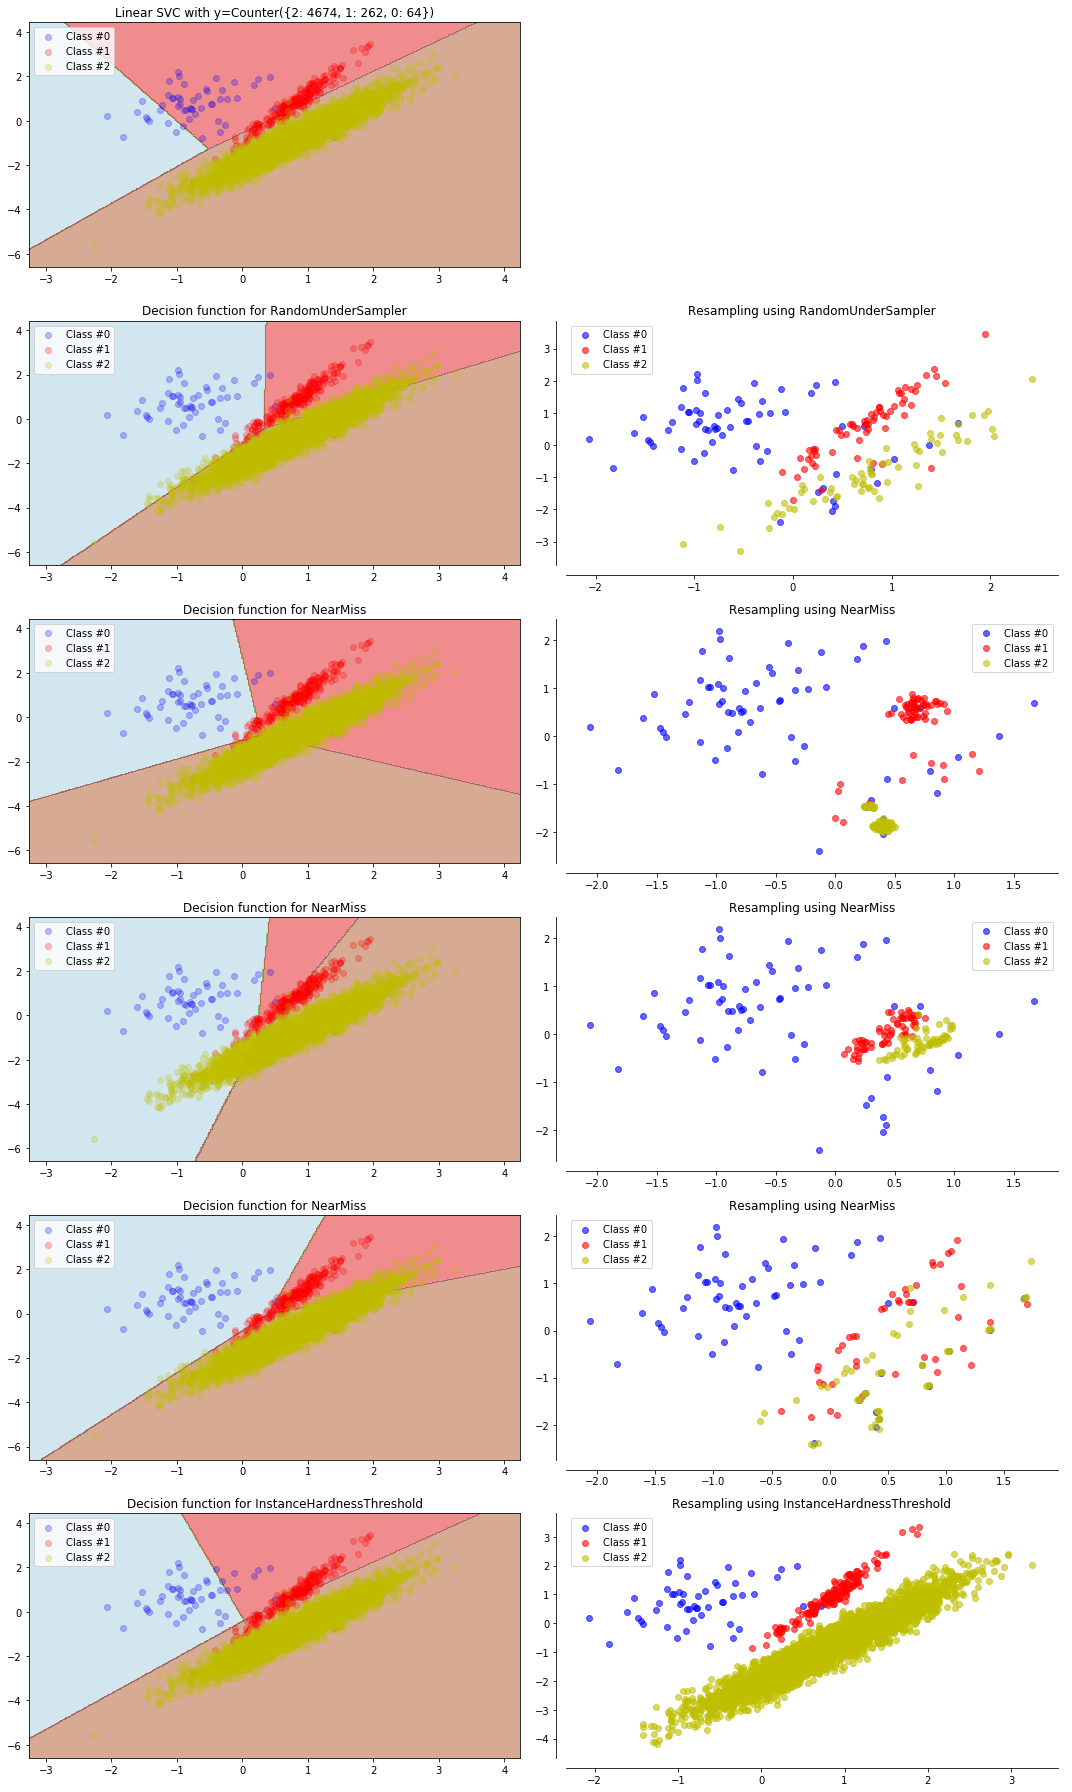

In [11]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8),
    (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(15, 25))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)
                                               
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = ((ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12))
for ax, sampler in zip(ax_arr, (RandomUnderSampler(random_state=0),
                                NearMiss(version=1, random_state=0),
                                NearMiss(version=2, random_state=0),
                                NearMiss(version=3, random_state=0),
                                InstanceHardnessThreshold(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()

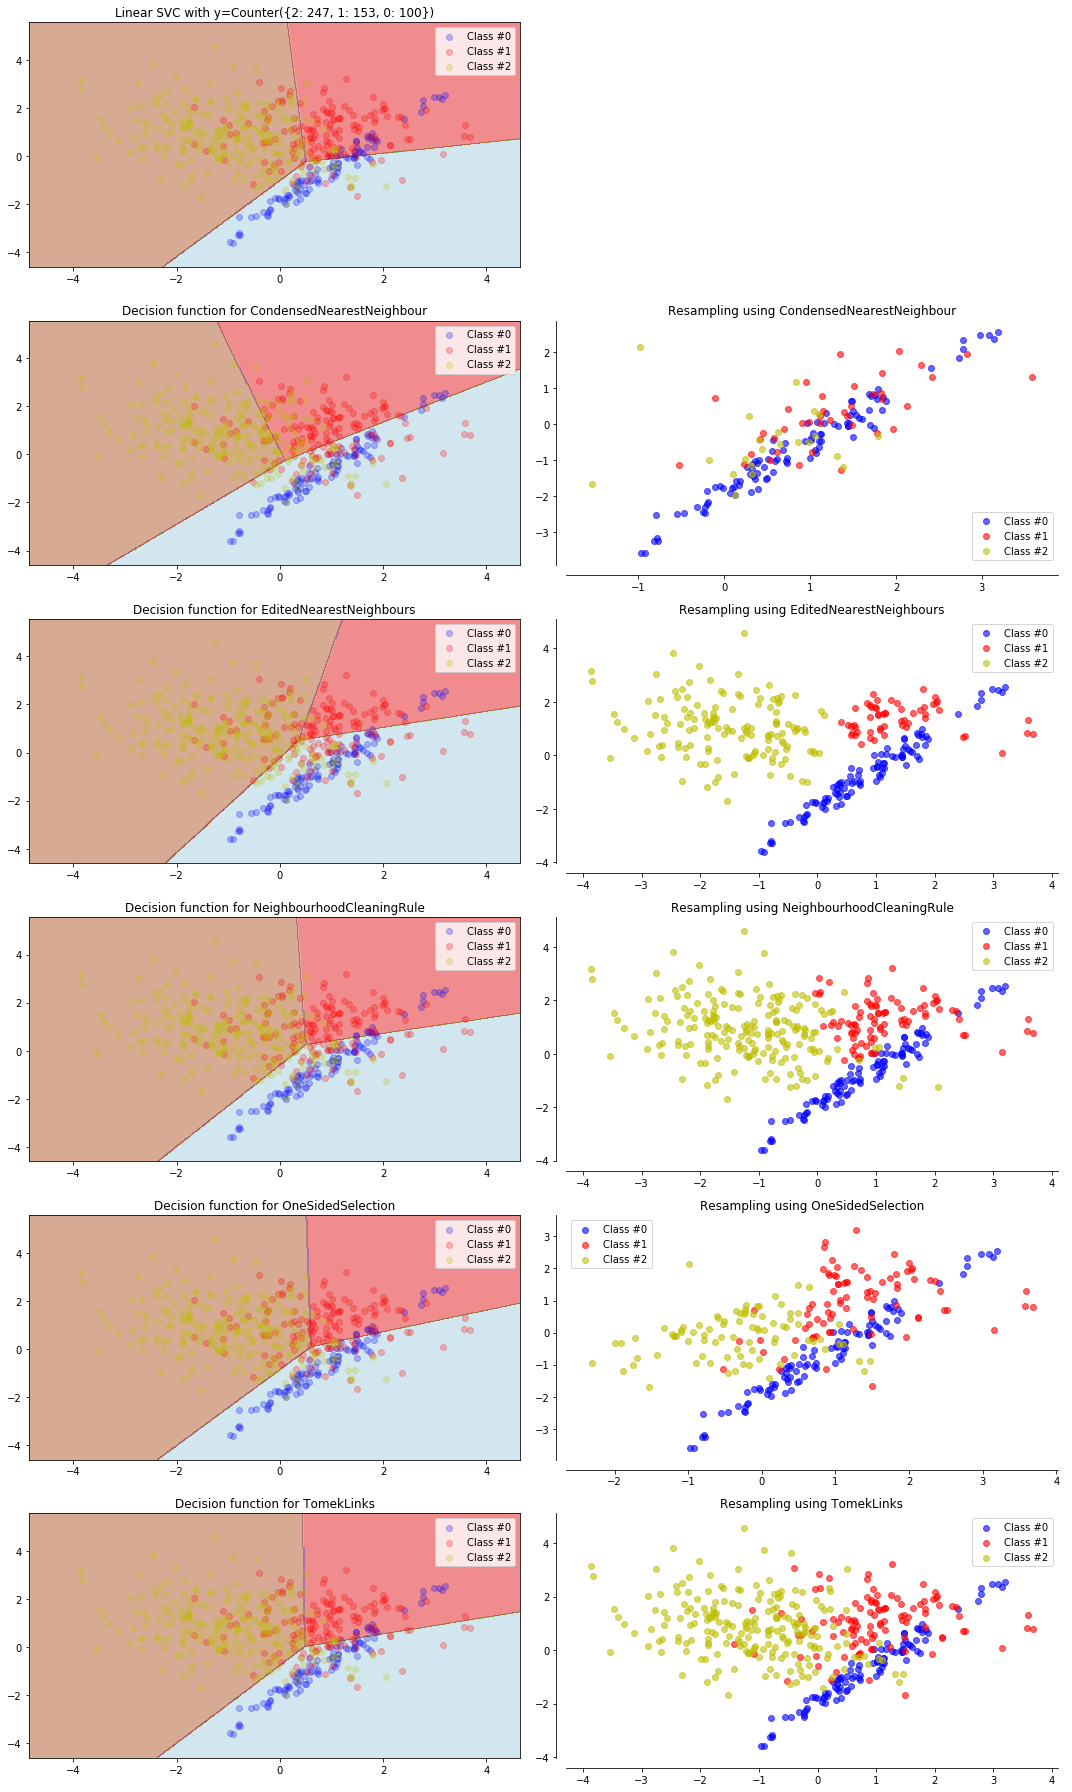

In [16]:
f, ((ax1, ax2), (ax3, ax4),
    (ax5, ax6), (ax7, ax8),
    (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(15, 25))
X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)
                                               
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
ax2.axis('off')

ax_arr = ((ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12))
for ax, sampler in zip(ax_arr, (CondensedNearestNeighbour(random_state=0),
                                EditedNearestNeighbours(random_state=0),
                                NeighbourhoodCleaningRule(random_state=0),
                                OneSidedSelection(random_state=0),
                                TomekLinks(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(sampler.__class__.__name__))
plt.tight_layout()
plt.show()